# HN Job postings EDA

In [335]:
import pandas as pd
import matplotlib.pyplot as plt

In [336]:
data = pd.read_csv("../data/bq-results-20221002-182802-1664735331446.csv", delimiter=",")
data[0:5]

,title,url,text,dead,by,score,time,timestamp,type,id,parent,descendants,ranking,deleted
0,NaN,NaN,NaN,NaN,NaN,NaN,1317776562,2011-10-05 01:02:42 UTC,job,3073686,NaN,NaN,NaN,True
1,NaN,NaN,NaN,NaN,NaN,NaN,1292522146,2010-12-16 17:55:46 UTC,job,2012925,NaN,NaN,NaN,True
2,NaN,NaN,NaN,NaN,NaN,NaN,1218661296,2008-08-13 21:01:36 UTC,job,275489,NaN,NaN,NaN,True
3,NaN,NaN,NaN,NaN,NaN,NaN,1404184422,2014-07-01 03:13:42 UTC,job,7969000,NaN,NaN,NaN,True
4,NaN,NaN,NaN,NaN,NaN,NaN,1381187888,2013-10-07 23:18:08 UTC,job,6511992,NaN,NaN,NaN,True


In [337]:
data.shape

(15744, 14)

In [338]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15744 entries, 0 to 15743
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        15138 non-null  object 
 1   url          11675 non-null  object 
 2   text         3525 non-null   object 
 3   dead         114 non-null    object 
 4   by           15138 non-null  object 
 5   score        15138 non-null  float64
 6   time         15744 non-null  int64  
 7   timestamp    15744 non-null  object 
 8   type         15744 non-null  object 
 9   id           15744 non-null  int64  
 10  parent       0 non-null      float64
 11  descendants  0 non-null      float64
 12  ranking      0 non-null      float64
 13  deleted      605 non-null    object 
dtypes: float64(4), int64(2), object(8)
memory usage: 1.7+ MB


In [339]:
# select rows where deleted column value is not null
data[data['deleted'].notnull()]

# count number of rows where deleted column value is True
data[data['deleted'] == True].shape

(605, 14)

In [340]:
# drop rows where deleted column value is True
data = data[data['deleted'] != True]

In [341]:
data.shape

(15139, 14)

In [342]:
# select rows where dead column value is not null. limit to 5 rows
data[data['dead'].notnull()][0:3]

,title,url,text,dead,by,score,time,timestamp,type,id,parent,descendants,ranking,deleted
546,NaN,NaN,NaN,True,NaN,NaN,1525885253,2018-05-09 17:00:53 UTC,job,17031483,NaN,NaN,NaN,NaN
677,Octopart Is Hiring Hardware Hackers in NYC,NaN,"At Octopart, we&#x27;re opening up the world o...",True,sam,1.0,1391450145,2014-02-03 17:55:45 UTC,job,7172288,NaN,NaN,NaN,NaN
761,Refer.ly (YC S12) Seeking Senior PHP Engineer,NaN,About Us:\nA social ecommerce marketplace wher...,True,dmor,1.0,1343959945,2012-08-03 02:12:25 UTC,job,4332164,NaN,NaN,NaN,NaN


In [343]:
# drop rows where dead column value is True
data = data[data['dead'] != True]

In [344]:
# drop all columns except title, url, text & timestamp
data = data[['title', 'url', 'text', 'timestamp']]
data[0:5]

,title,url,text,timestamp
606,Experiment (YC W13) Is Hiring a Reviewer (Remote),NaN,This is part-time position where pay is $20&#x...,2022-02-13 17:00:07 UTC
607,"FOBO (YC S11) – Growth Engineer Wanted, local ...",NaN,"Fobo, a local marketplace undergoing rapid-gro...",2014-04-17 21:53:09 UTC
608,"Yardsale - Mobile Marketplace, Seeking iOS/Rai...",NaN,We’re a small team of developers rethinking th...,2012-08-04 18:36:15 UTC
609,Yardsale - Join us in taking on eBay (S11),NaN,"Yardsale is a top 125 app for iOS, ranked #4 i...",2012-06-30 19:53:12 UTC
610,"Yardsale - Mobile Marketplace, Seeking iOS/Rai...",NaN,We’re a small team of developers rethinking th...,2012-07-28 20:33:55 UTC


In [345]:
# calculate row count where url column value is not null
data[data['url'].notnull()].shape

(11644, 4)

In [346]:
# list 5 first rows where url column value is not null
data[data['url'].notnull()][0:5]

,title,url,text,timestamp
4069,Mux is hiring engineers to build cloud video APIs,http://mux.com,NaN,2018-09-12 00:22:26 UTC
4070,Mux is hiring engineers to make online video i...,http://mux.com,NaN,2018-08-15 02:12:18 UTC
4071,Path (YC S19) is hiring engineers to automate ...,https://path.me,NaN,2022-01-29 17:00:48 UTC
4072,Kable (usage-based billing for APIs) is hiring...,http://kable.io/,NaN,2022-06-06 12:01:05 UTC
4073,Open source GraphQL jobs at Apollo/Meteor (rem...,http://meteor.io,NaN,2017-06-27 18:47:07 UTC


In [347]:
# drop rows where url matches "goo.gl"
data = data[~data['url'].str.contains("goo.gl", na=False)]

In [348]:
# since the data contains many duplicate urls, let's see how many unique urls we have
data['url'].nunique()

5047

In [349]:
# select row count grouped by url. first 10 rows
data.groupby('url').size().sort_values(ascending=False)[0:10]

url
https://jobs.lever.co/buildzoom                            180
https://www.easypost.com/jobs                              175
https://flexport.com/careers                               126
http://www.irisonboard.com/careers/                         92
https://www.tesorio.com/careers#job-openings                81
https://www.tesorio.com/careers/                            81
https://www.flexport.com/careers/department/engineering     65
https://www.easypost.com/careers                            63
https://swiftype.com/jobs                                   62
https://drchrono.com/jobs                                   59
dtype: int64

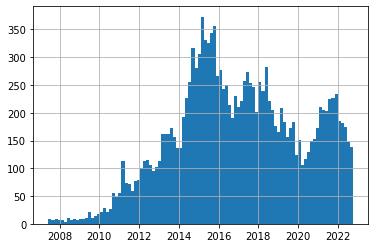

In [350]:
# plot the number of records over time
data['timestamp'] = pd.to_datetime(data['timestamp'])
data['timestamp'].hist(bins=100)
plt.show()

So we got around 5000 jobs postings to analyze. Let's see what we can find.

In [351]:
# list 5 first rows where url is not null

# write a regular expression to extract the domain name from the url
import re
def extract_domain(url):
    # if url is None or null, return None
    if pd.isnull(url):
        return None
    return re.search(r'(?<=://)(.*?)(?=/|$)', url).group(0)

# update the url column by applying the regular expression to extract the domain name
data['url'] = data['url'].apply(extract_domain)


In [352]:
# drop duplicates based on url column
data = data.drop_duplicates(subset=['url'])
# calculate row count
data.shape

(1000, 4)

In [353]:
# count the number of records in year 2022
data[data['timestamp'].dt.year == 2022].shape

(57, 4)

In [354]:
# list last 50 rows in year 2022 ordered by timestamp descending
data[data['timestamp'].dt.year == 2022].sort_values(by='timestamp', ascending=False)[0:50]

,title,url,text,timestamp
8454,Pachyderm Is Hiring Sales Engineers and Soluti...,www.pachyderm.com,NaN,2022-09-28 14:45:26+00:00
10118,AiSupervision (YC W22) is hiring an intern (re...,www.aisupervision.com,NaN,2022-09-27 13:39:57+00:00
7119,Motion (YC W20) Is Hiring Senior Full Stack an...,www.usemotion.com,NaN,2022-09-23 17:01:06+00:00
6040,Deepnote (YC S19) is hiring engineers to build...,deepnote.com,NaN,2022-09-23 12:00:38+00:00
4326,Patterns (YC S21) Is hiring devs to help us bu...,patterns.app,NaN,2022-09-14 17:00:03+00:00
11645,Olark (YC W09) Is Hiring an Account Executive ...,olark.hire.trakstar.com,NaN,2022-09-09 21:00:15+00:00
5276,Patterns (YC S21) Is hiring to build the OS fo...,www.patterns.app,NaN,2022-08-30 17:00:42+00:00
8869,Contentedge (YC W17) is hiring engineers to bu...,www.contentedge.com,NaN,2022-08-25 17:01:06+00:00
14791,TaxProper (YC S19) Is Hiring,taxproper.notion.site,NaN,2022-08-18 21:00:24+00:00
9313,Mozart Data (YC S20) is Hiring a Data Analyst ...,www.mozartdata.com,NaN,2022-08-18 17:00:23+00:00


In [355]:
# count the number of records grouped by domain name in year 2022. list first 10 rows
data[data['timestamp'].dt.year == 2022].groupby('url').size().sort_values(ascending=False)[0:10]

url
bristle.notion.site         1
careers.atob.com            1
taxproper.notion.site       1
upchieve.welcomekit.co      1
withcompound.com            1
www.aisupervision.com       1
www.aptible.com             1
www.aquariumlearning.com    1
www.ashbyhq.com             1
www.cointracker.io          1
dtype: int64

In [356]:
# save the data to a csv file as "filtered_data.csv" ordered by timestamp descending
data.sort_values(by='timestamp', ascending=False).to_csv("../data/filtered_data.csv", index=False)

In [ ]:
# Note: there are still some duplicates by url e.g. www.patterns.app and patterns.app